In [1]:
import collections
import numpy as np
import pickle
import time
import librosa
import librosa.display
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numba
from PIL import Image

In [2]:
with open('data/zgroup2', 'rb') as f:
    audio_data = pickle.load(f)

with open('data/zgroup3', 'rb') as f:
    testdata = pickle.load(f)

@numba.njit
def svd(dmatrix):
    return np.linalg.svd(dmatrix, full_matrices=False)

counts = collections.Counter([x[1] for x in audio_data])

In [3]:
genres = []

for x in range(19):
    genres.append(np.array([y[0] for y in audio_data if y[1] == x]))

In [4]:
np.random.shuffle(audio_data)
adata = []
for x in range(19):
    count = 0
    pack = []
    iter = 0
    while count < 450:
        if audio_data[iter][1] == x:
            pack.append(audio_data.pop(iter)[0])
            count += 1
        iter += 1
    adata.extend(pack)

np.random.shuffle(adata)

In [60]:
genre = [x[0] for x in audio_data if x[1] == 8]
np.random.shuffle(genre)
genre = genre[:1000]

In [5]:
lows = np.array([x[:26, :] for x in adata])
mids = np.array([x[18:82, :] for x in adata])
highs = np.array([x[70:, :] for x in adata])

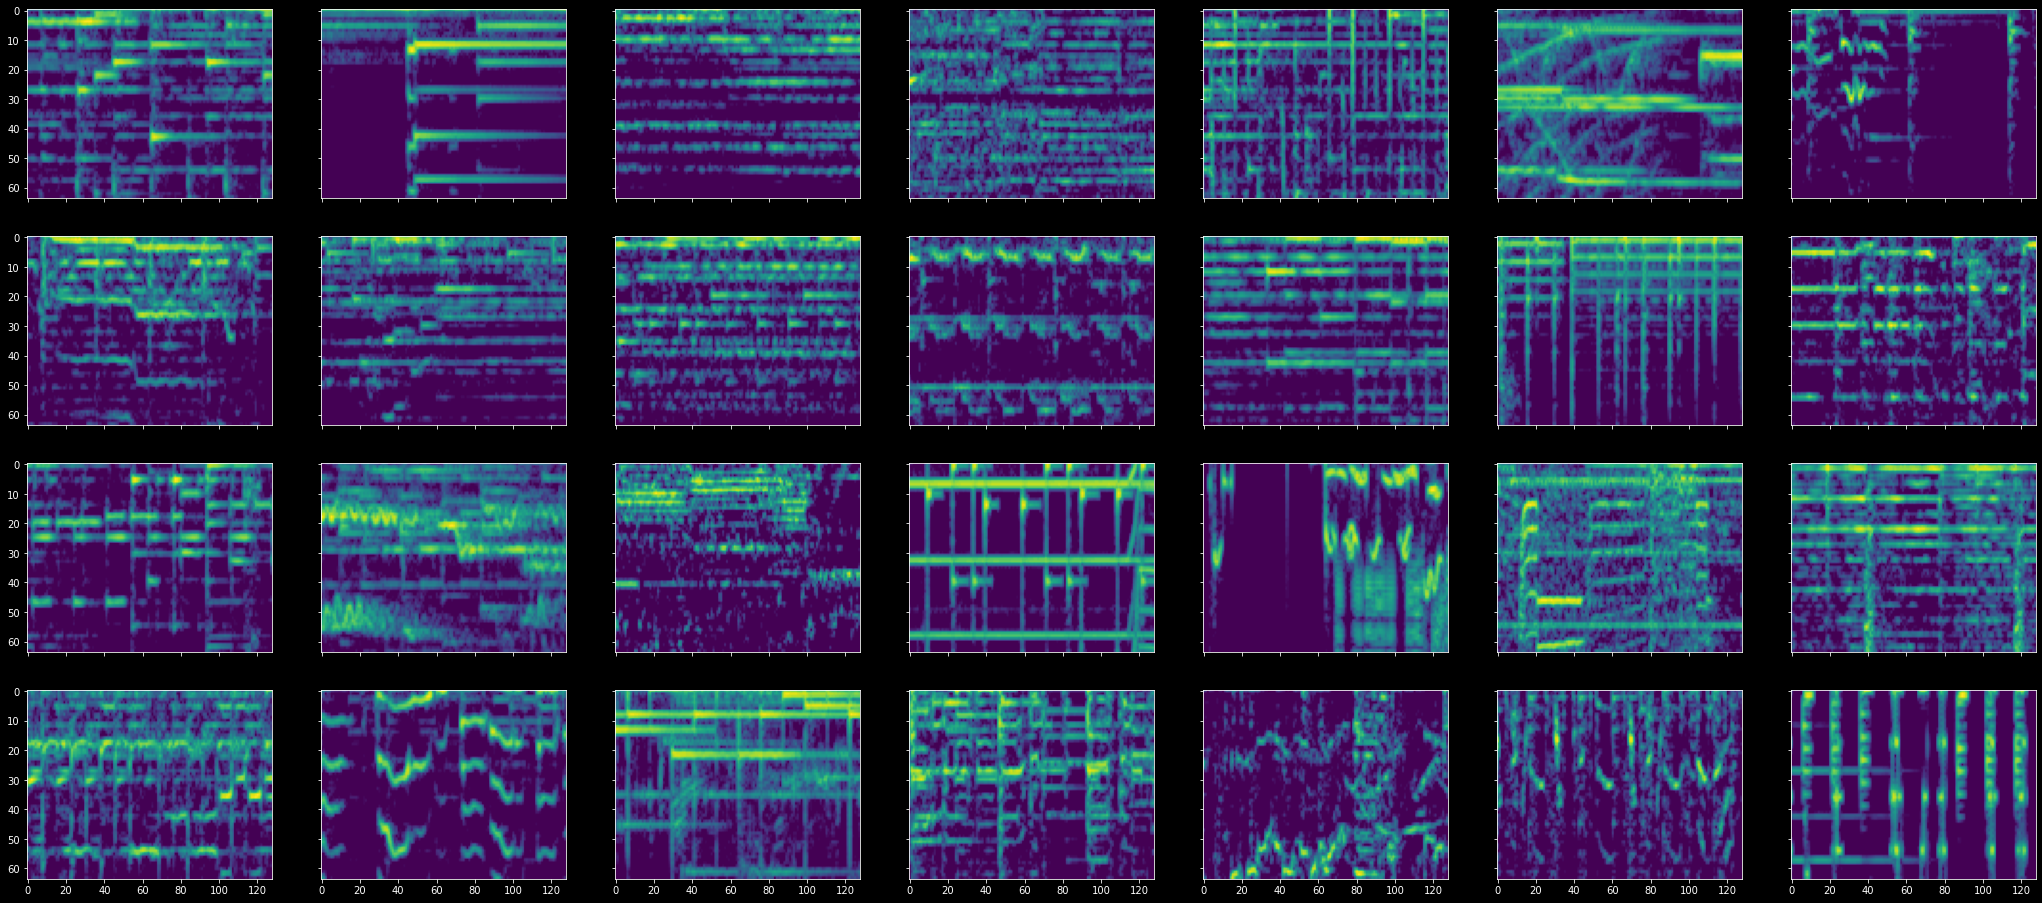

In [7]:

np.random.shuffle(mids)
fig, axs = plt.subplots(4, 7, sharex=True, sharey=True)
fig.set_size_inches(36, 16)
for x in range(4):
    for y in range(7):
        axs[x][y].imshow(mids[(x * 9) + y], aspect='auto')


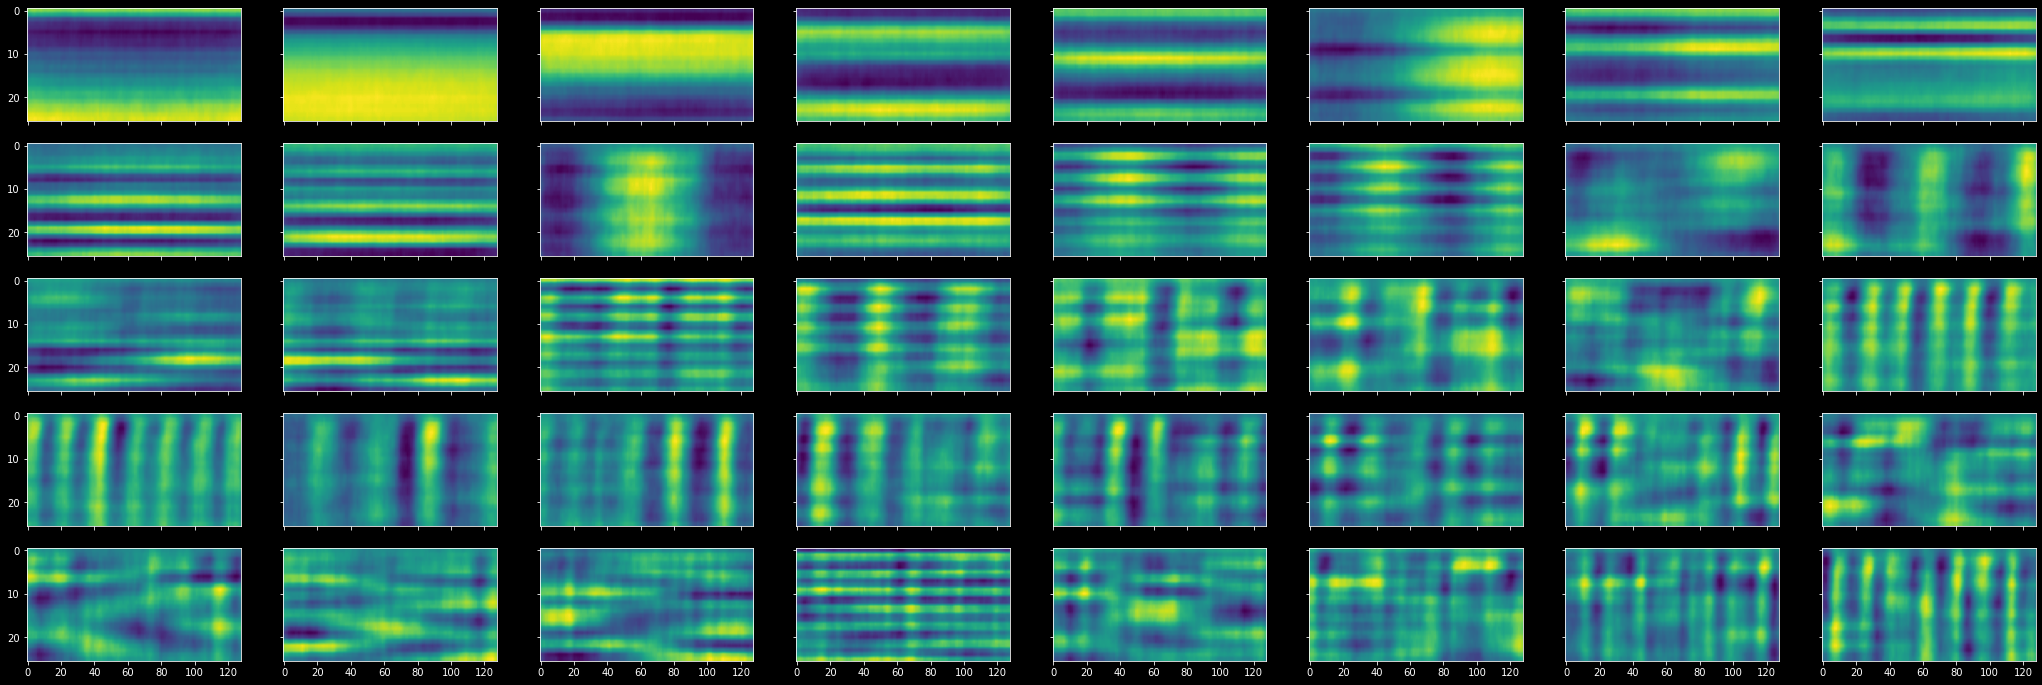

In [6]:
#26, 64, 122
nsamples = len(adata)
target = lows
dims = 26, 128

ftarg = np.array([x.flatten() * 128 for x in target], dtype=np.float32)
lavg = np.mean(target, axis=0)
lmstarg = np.array([x - lavg for x in target], dtype=np.float32).reshape(nsamples, dims[0] * dims[1])
lu, ls, lv = svd(lmstarg.T)

fig, axs = plt.subplots(5, 8, sharex=True, sharey=True)
fig.set_size_inches(36, 12)
for x in range(5):
    for y in range(8):
        item = lu.T[(x * 8) + y].reshape((dims[0], dims[1]))
        item = item + np.abs(np.min(item))
        xfac = 128 / np.max(item)
        axs[x][y].imshow(np.uint8(item * xfac), aspect='auto')

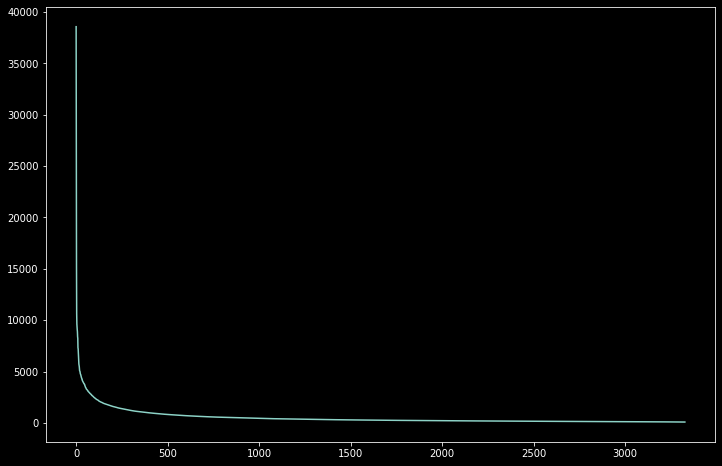

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.plot(ls)

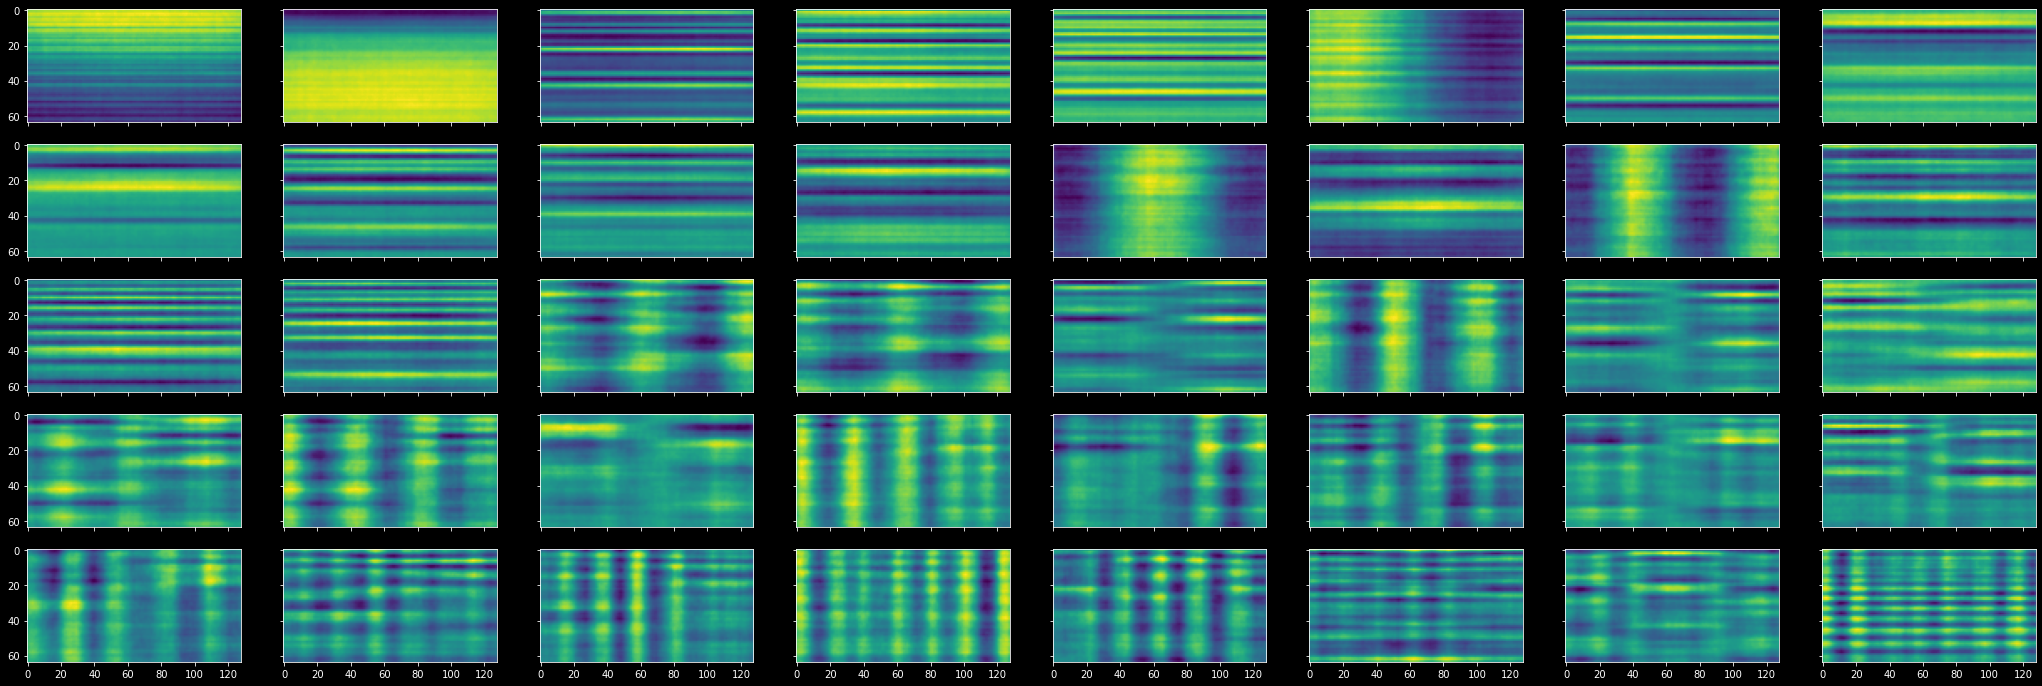

In [6]:
#26, 64, 122
nsamples = len(adata)
target = mids
dims = 64, 128

ftarg = np.array([x.flatten() * 128 for x in target], dtype=np.float32)
mavg = np.mean(target, axis=0)
mmstarg = np.array([x - mavg for x in target], dtype=np.float32).reshape(nsamples, dims[0] * dims[1])
mu, ms, mv = svd(mmstarg.T)

fig, axs = plt.subplots(5, 8, sharex=True, sharey=True)
fig.set_size_inches(36, 12)
for x in range(5):
    for y in range(8):
        item = mu.T[(x * 8) + y].reshape((dims[0], dims[1]))
        item = item + np.abs(np.min(item))
        xfac = 128 / np.max(item)
        axs[x][y].imshow(np.uint8(item * xfac), aspect='auto')

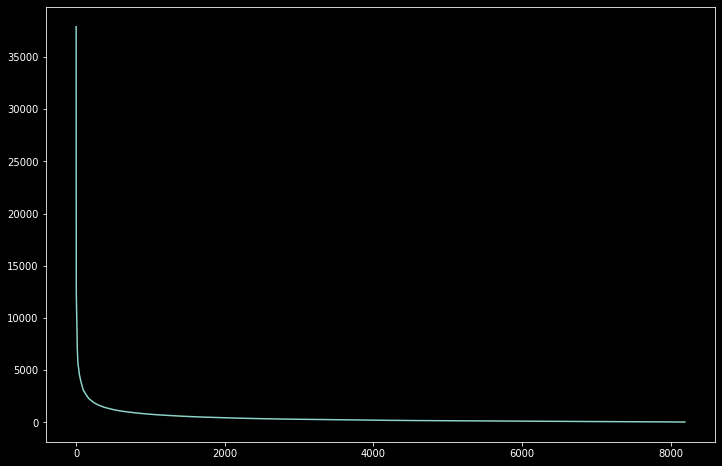

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.plot(ms)

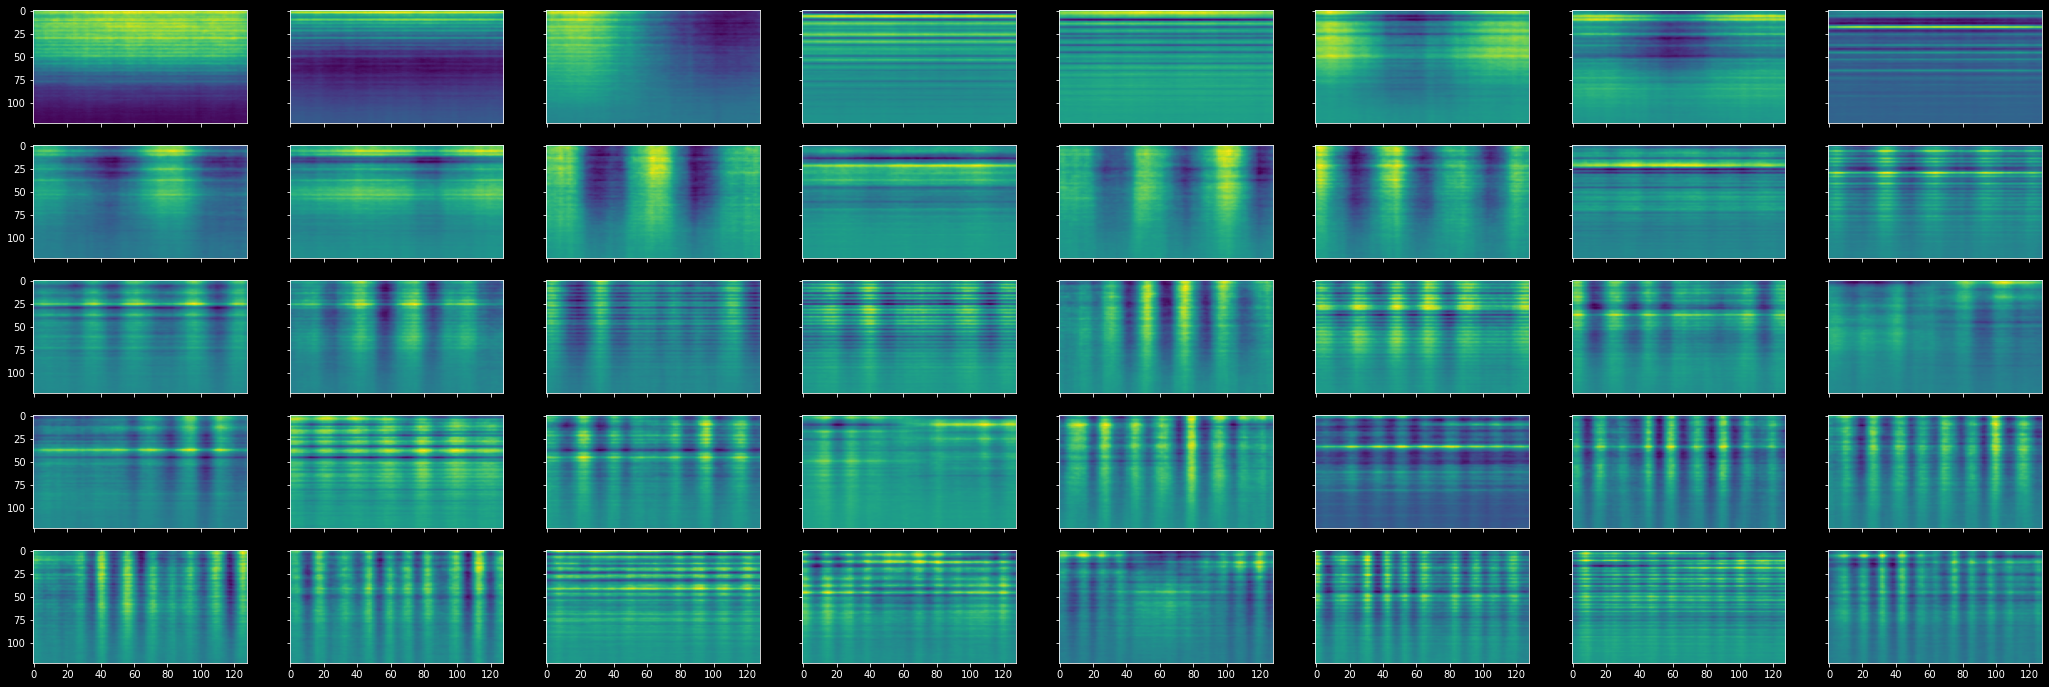

In [5]:
#26, 64, 122
nsamples = len(adata)
target = highs
dims = 122, 128

ftarg = np.array([x.flatten() * 128 for x in target], dtype=np.float32)
avgtarg = np.mean(target, axis=0)
mstarg = np.array([x - avgtarg for x in target], dtype=np.float32).reshape(nsamples, dims[0] * dims[1])
hu, hs, hv = np.linalg.svd(mstarg.T)


fig, axs = plt.subplots(5, 8, sharex=True, sharey=True)
fig.set_size_inches(36, 12)
for x in range(5):
    for y in range(8):
        item = hu.T[(x * 8) + y].reshape((dims[0], dims[1]))
        item = item + np.abs(np.min(item))
        xfac = 128 / np.max(item)
        axs[x][y].imshow(np.uint8(item * xfac), aspect='auto')

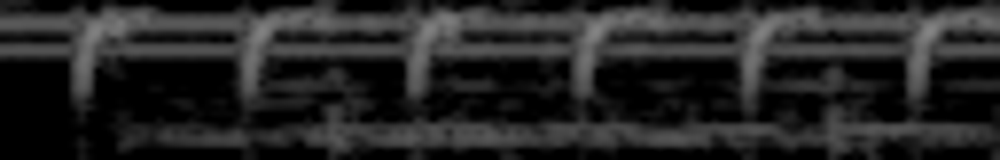

In [7]:
item = audio_data[40][0][:26]
item = item + np.abs(np.min(item))
xfac = 128 / np.max(item)

Image.fromarray(np.uint8(item * xfac)).resize((1000, 160))

In [8]:
tester = audio_data[40][0][:26]
mstest = np.reshape(tester - lavg, 26*128)

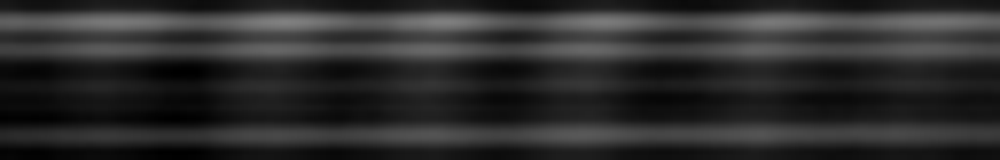

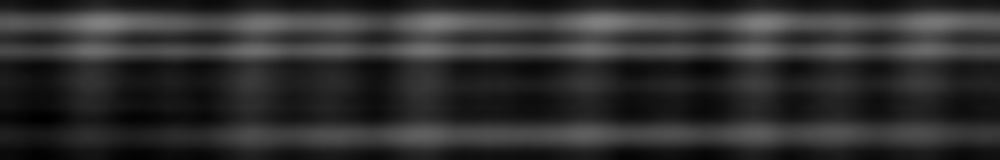

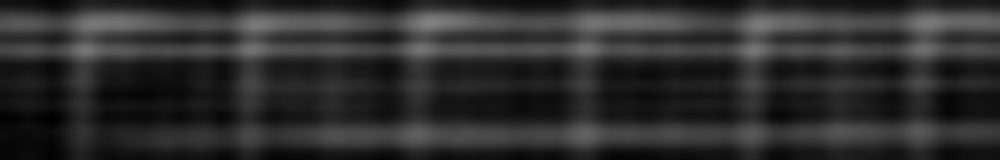

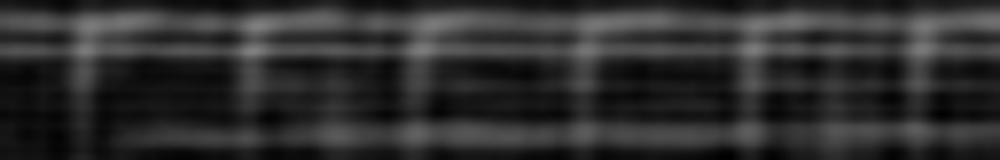

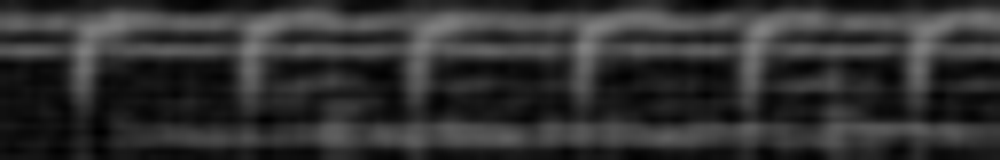

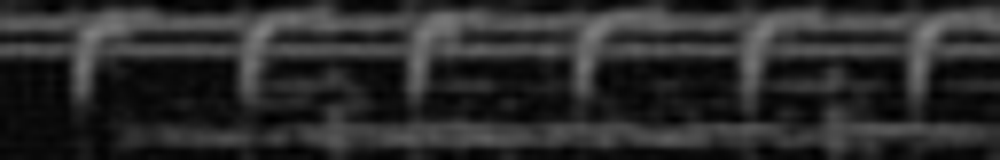

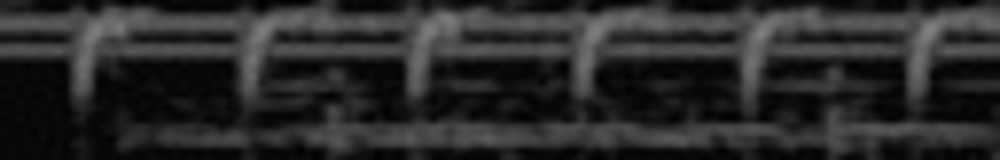

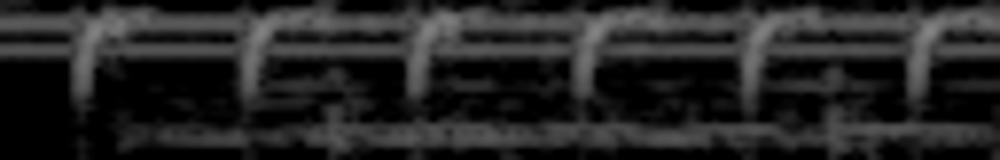

In [9]:
for x in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
    item = (lavg.reshape(26 * 128) + (lu.T[:x].T @ (lu.T[:x] @ mstest))).reshape(26, 128)
    item = item + np.abs(np.min(item))
    xfac = 128 / np.max(item)
    display(Image.fromarray(np.uint8(item * xfac)).resize((1000, 160)))

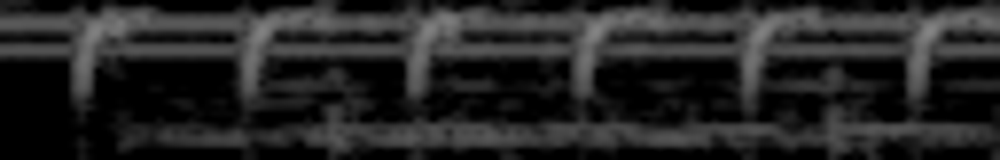

In [10]:
item = audio_data[40][0][:26]
item = item + np.abs(np.min(item))
xfac = 128 / np.max(item)

Image.fromarray(np.uint8(item * xfac)).resize((1000, 160))

4


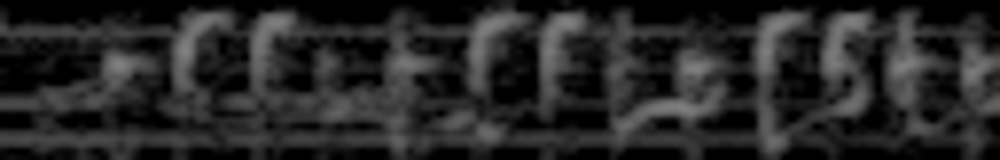

In [114]:
selection = 20
print(audio_data[selection][1])
test1 = audio_data[selection][0][:26]
item = test1 + np.abs(np.min(test1))
xfac = 128 / np.max(item)

Image.fromarray(np.uint8(item * xfac)).resize((1000, 160))

6


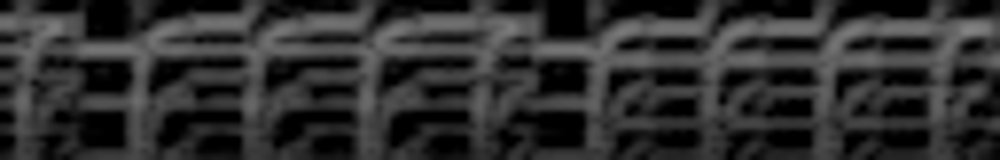

In [115]:
selection = 95
print(audio_data[selection][1])
test2 = audio_data[selection][0][:26]
item = test2 + np.abs(np.min(test2))
xfac = 128 / np.max(item)

Image.fromarray(np.uint8(item * xfac)).resize((1000, 160))

In [231]:
gnr1 = [x[0][:26] for x in audio_data if x[1] == 11]
gnr1 = np.array(gnr1[:1000]).reshape(-1, 26 * 128)
gnr1 = gnr1 - lavg.reshape(26 * 128)

gnr2 = [x[0][:26] for x in audio_data if x[1] == 0]
gnr2 = np.array(gnr2[:1000]).reshape(-1, 26 * 128)
gnr2 = gnr2 - lavg.reshape(26 * 128)

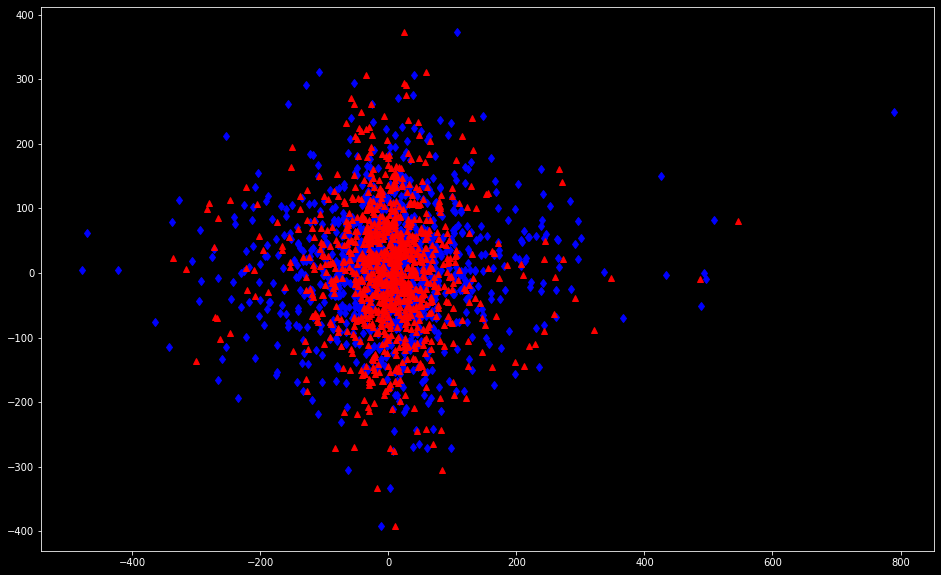

In [322]:
eigs = [6, 7]
coords1 = lu.T[eigs] @ gnr1.T
coords2 = lu.T[eigs] @ gnr2.T


fig = plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(coords1[0], coords1[1], 'd', color='b')
plt.plot(coords2[0], coords1[1], '^', color='r')
plt.show()

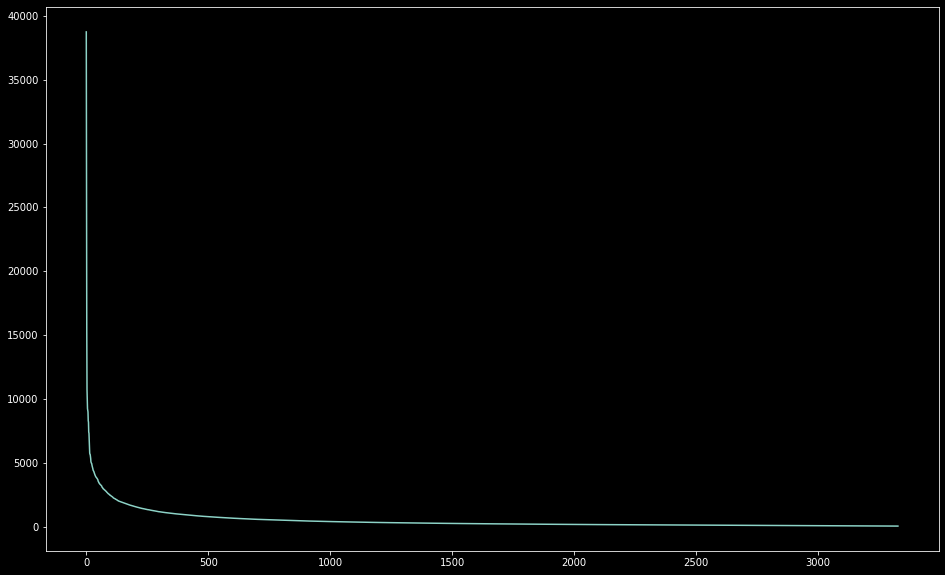

In [323]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes()

plt.plot(ls)
plt.show()

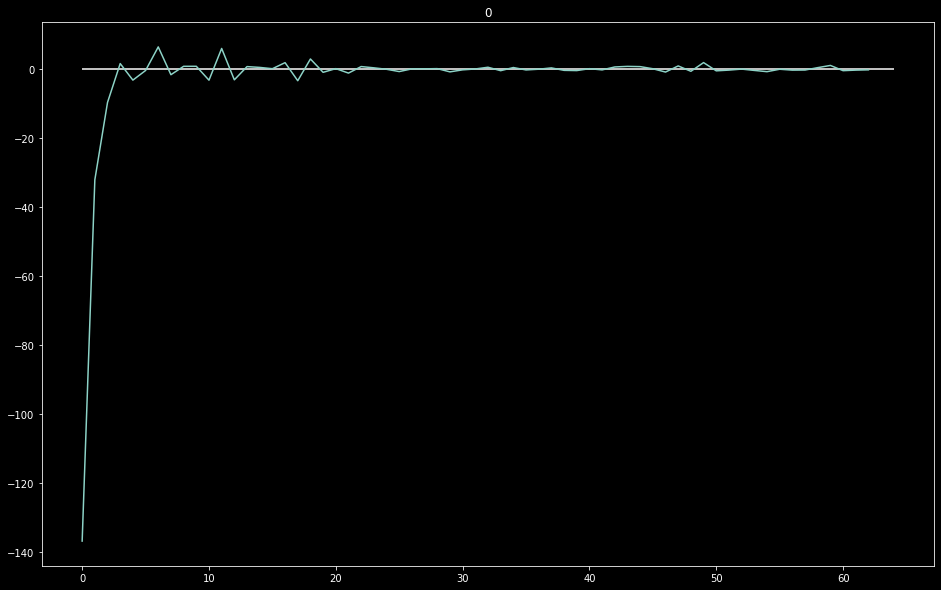

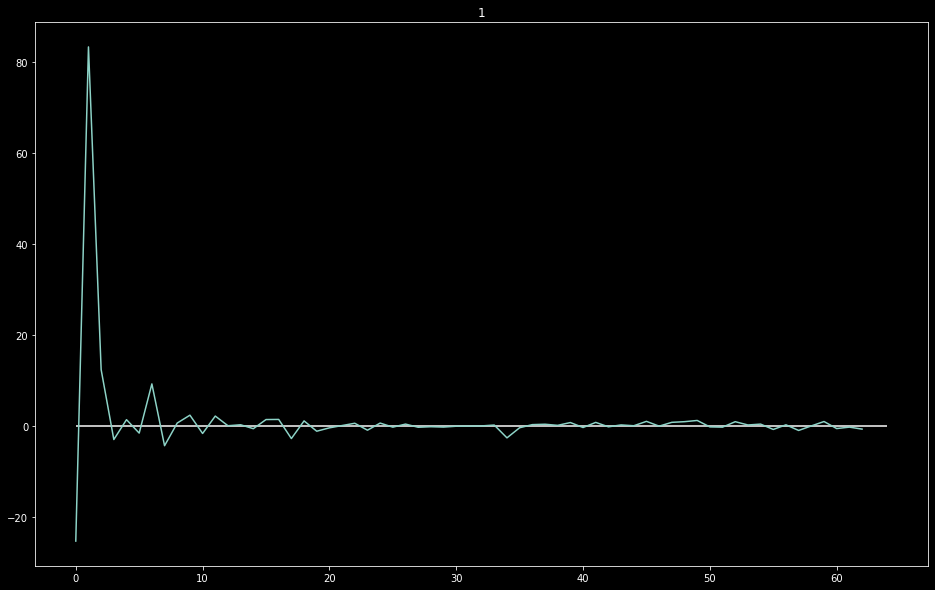

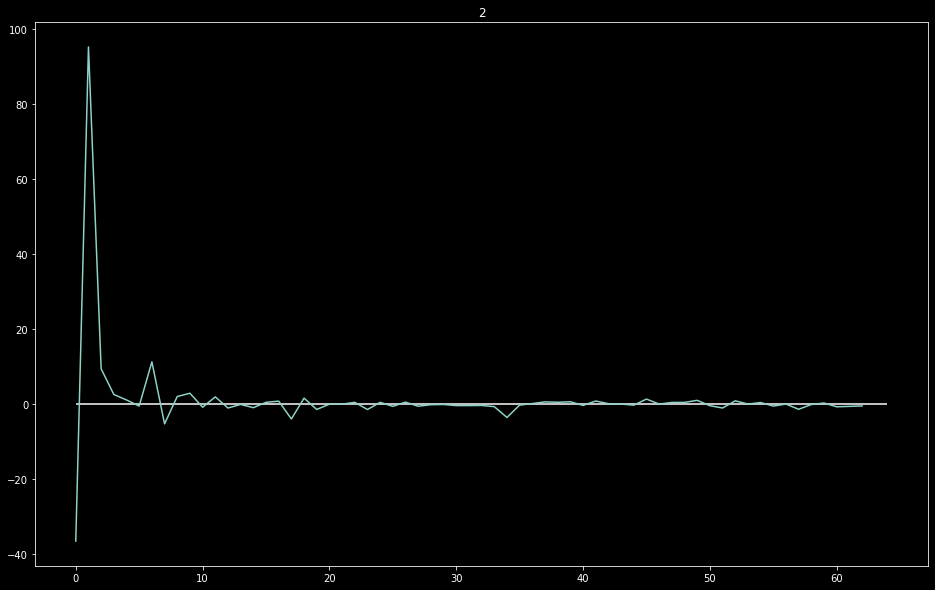

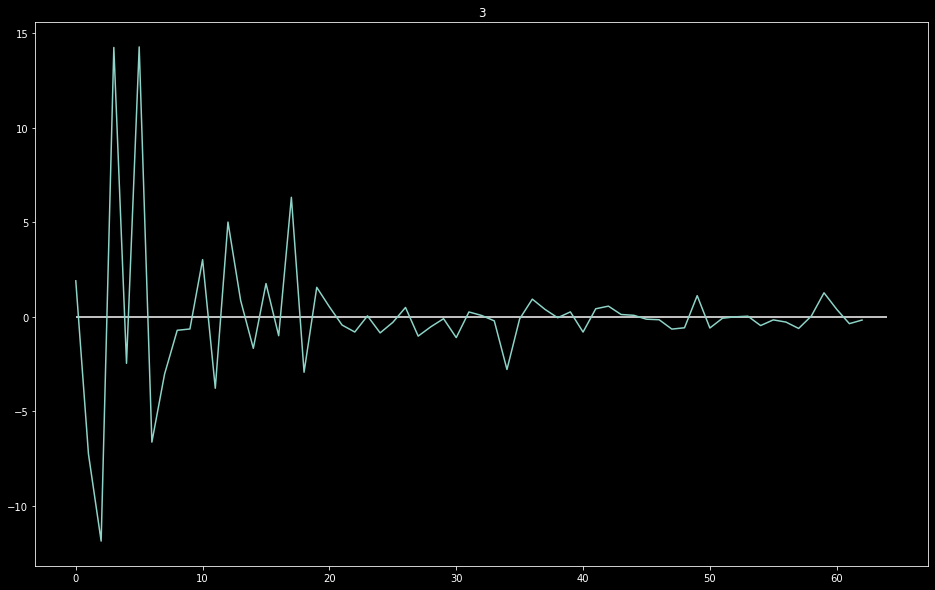

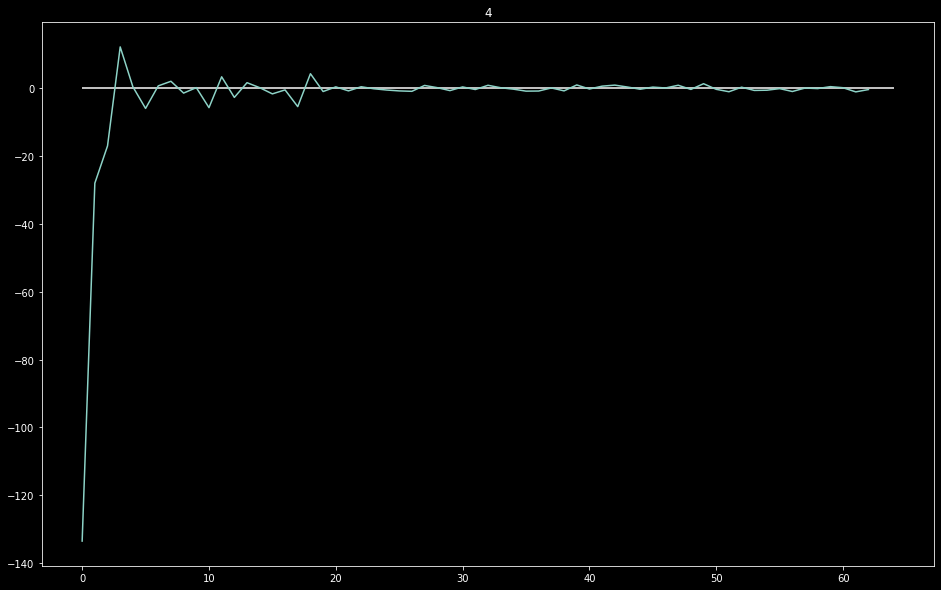

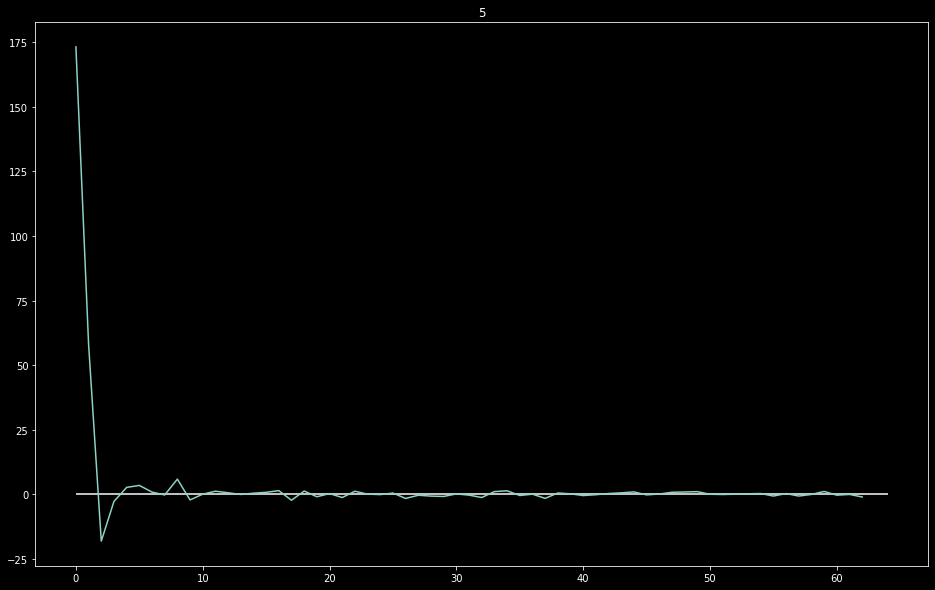

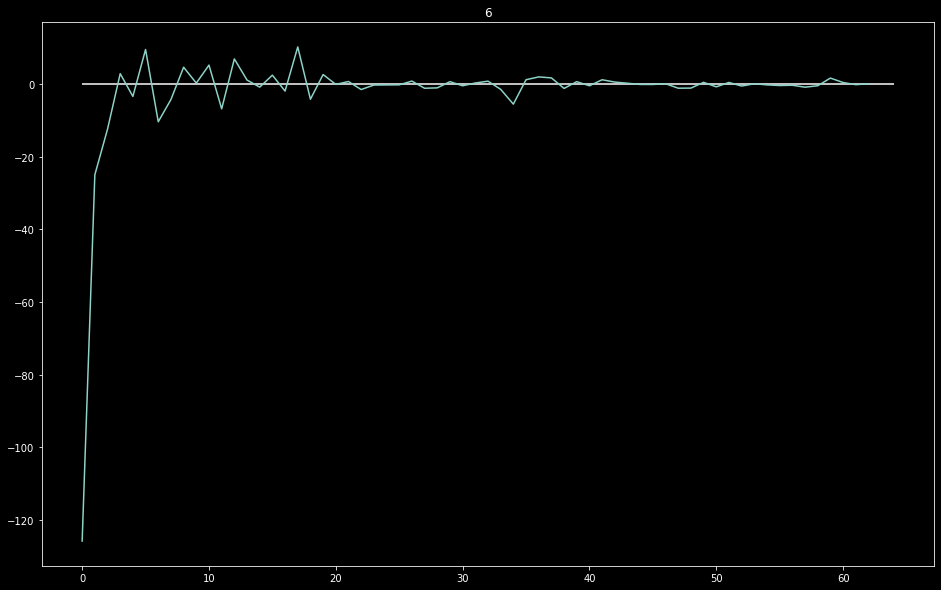

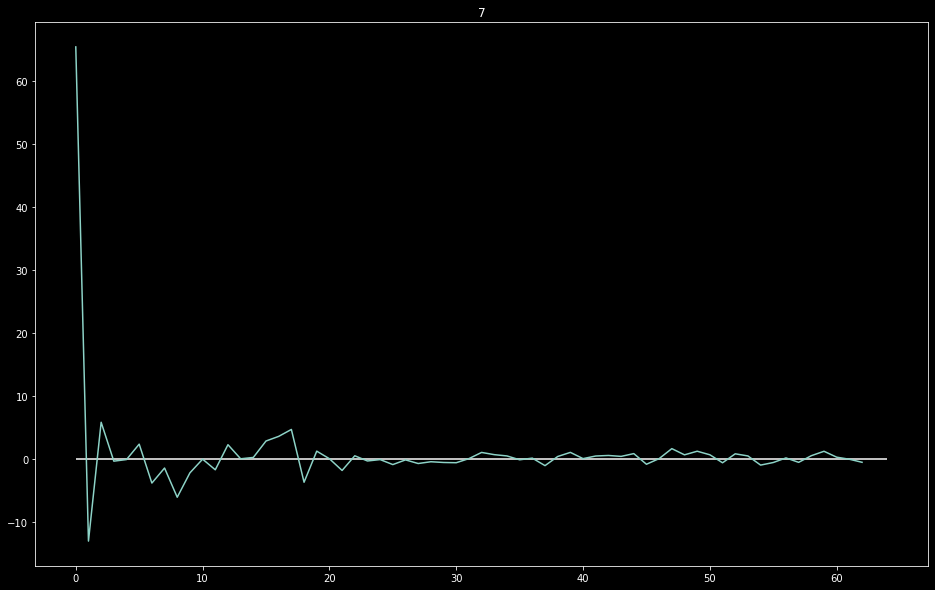

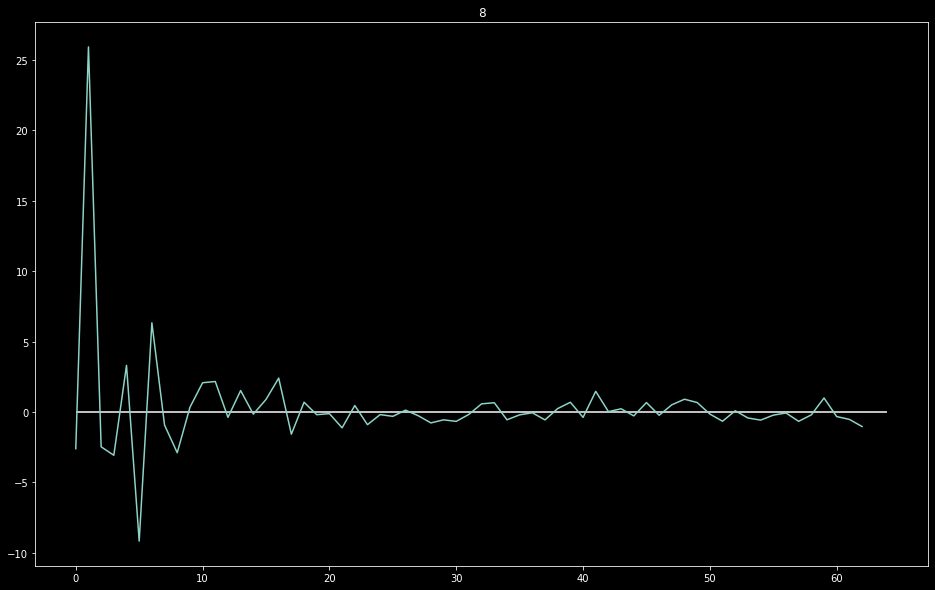

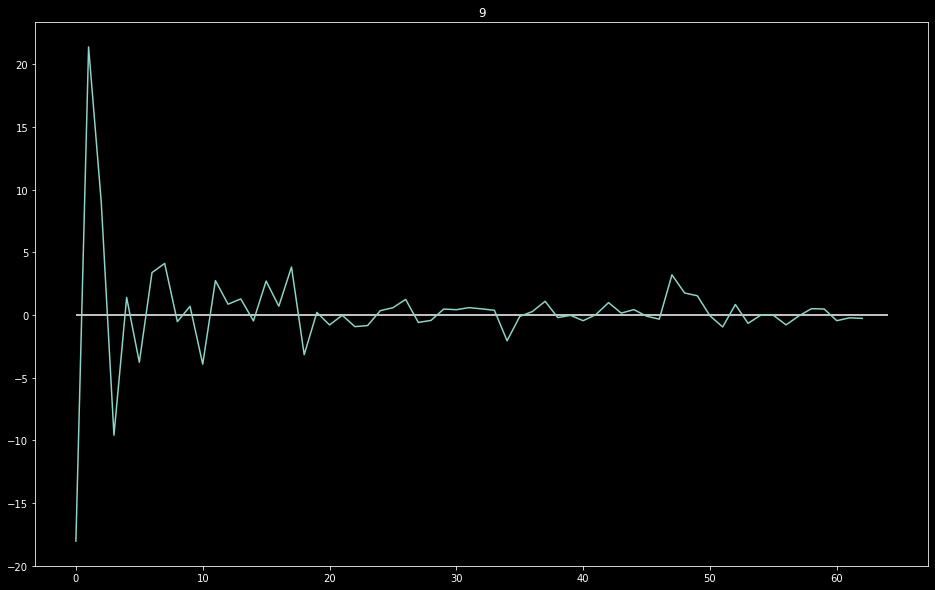

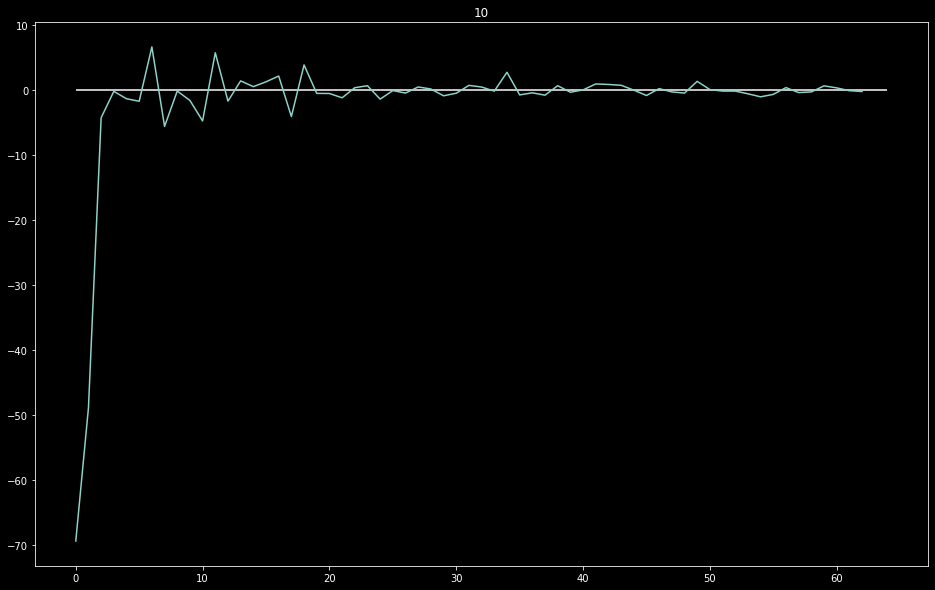

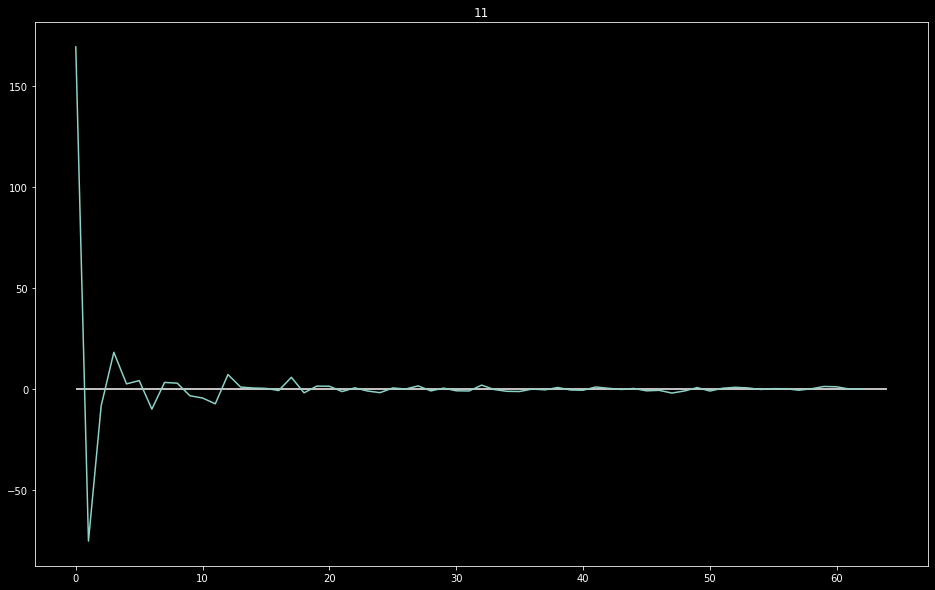

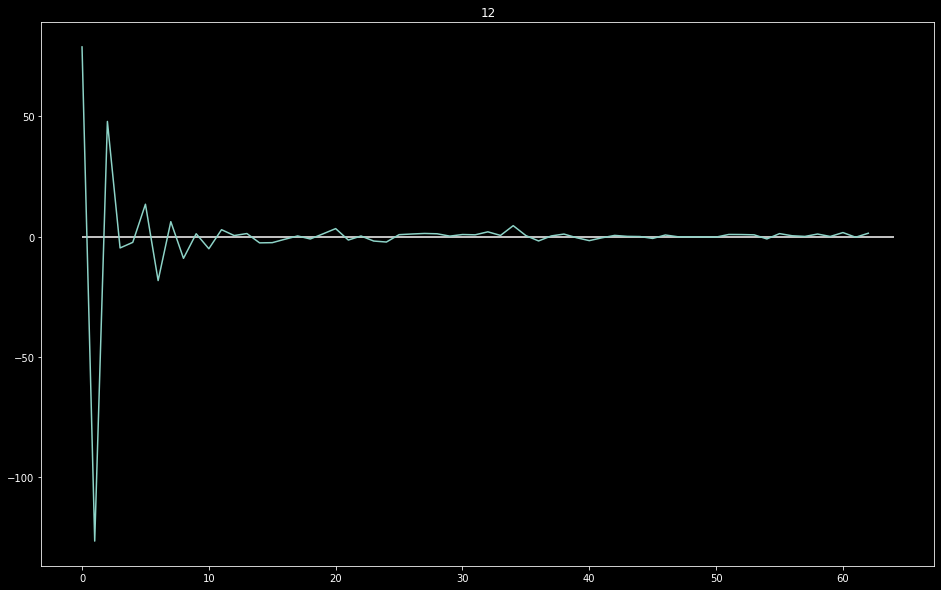

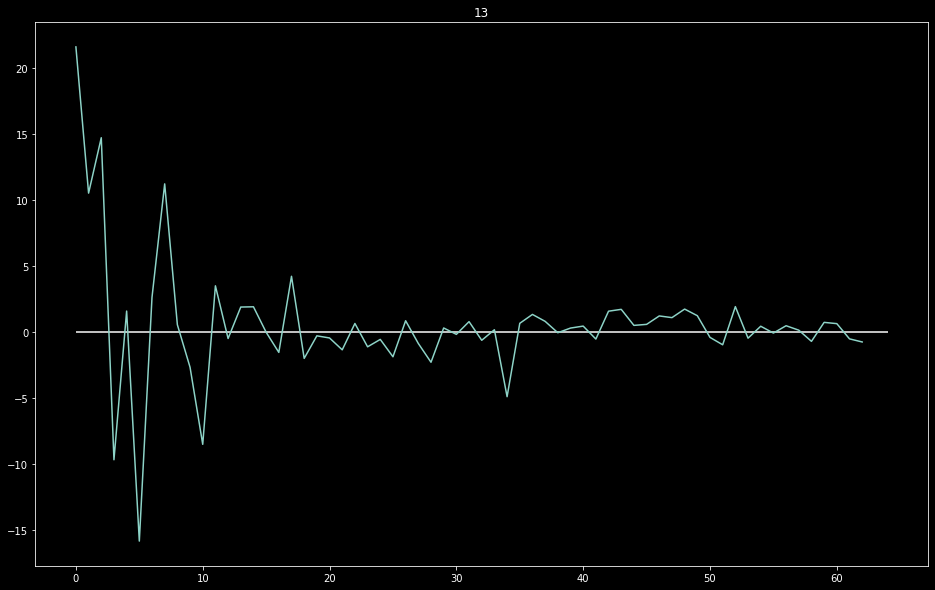

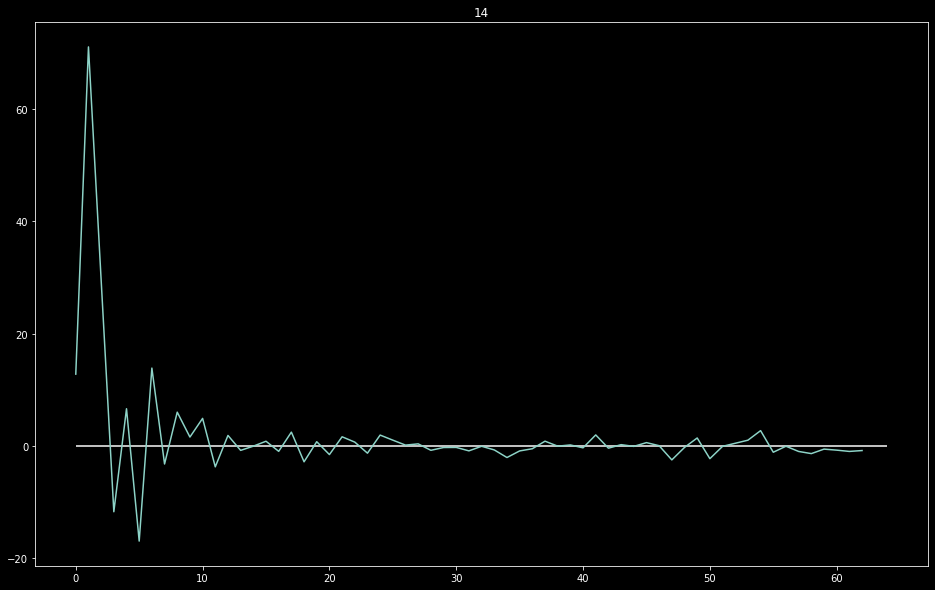

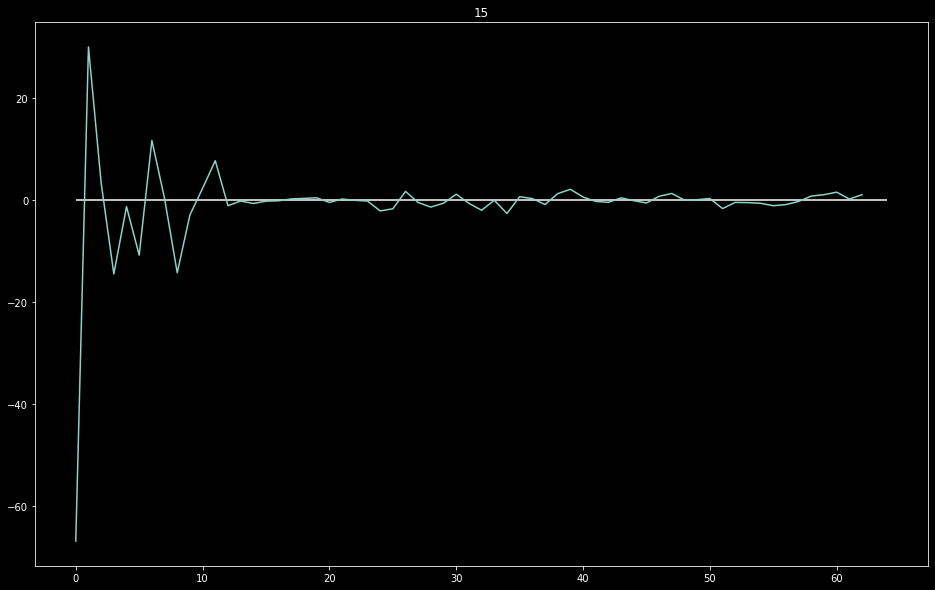

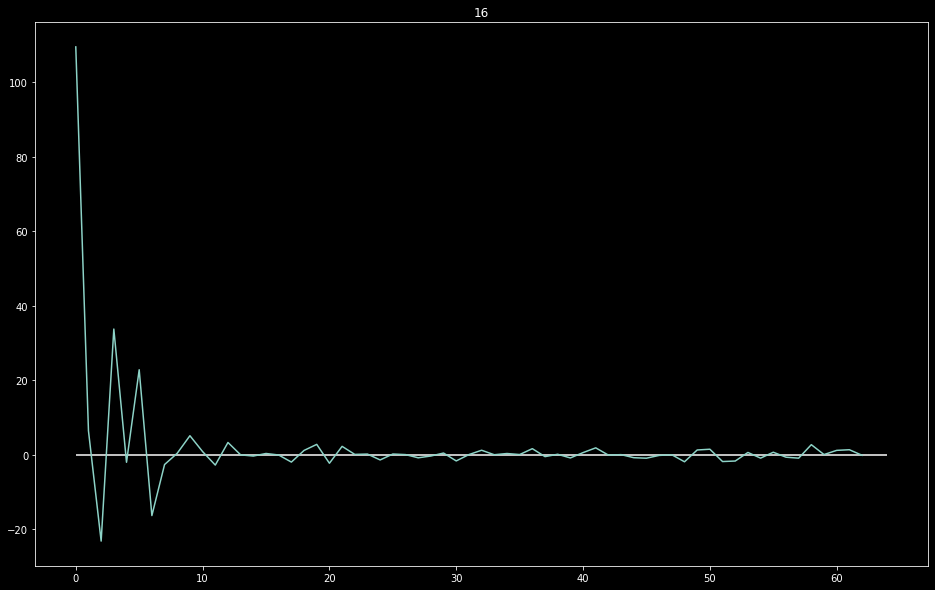

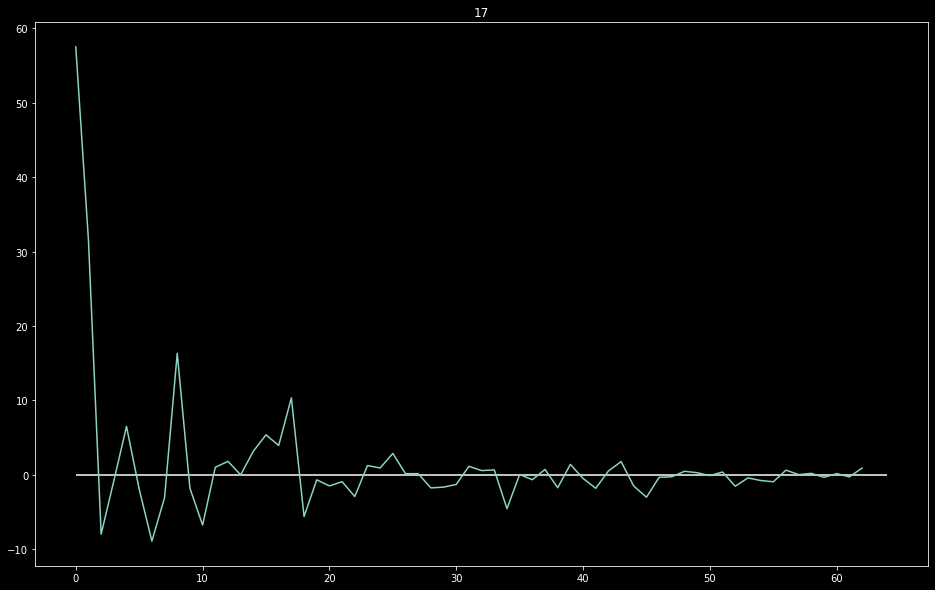

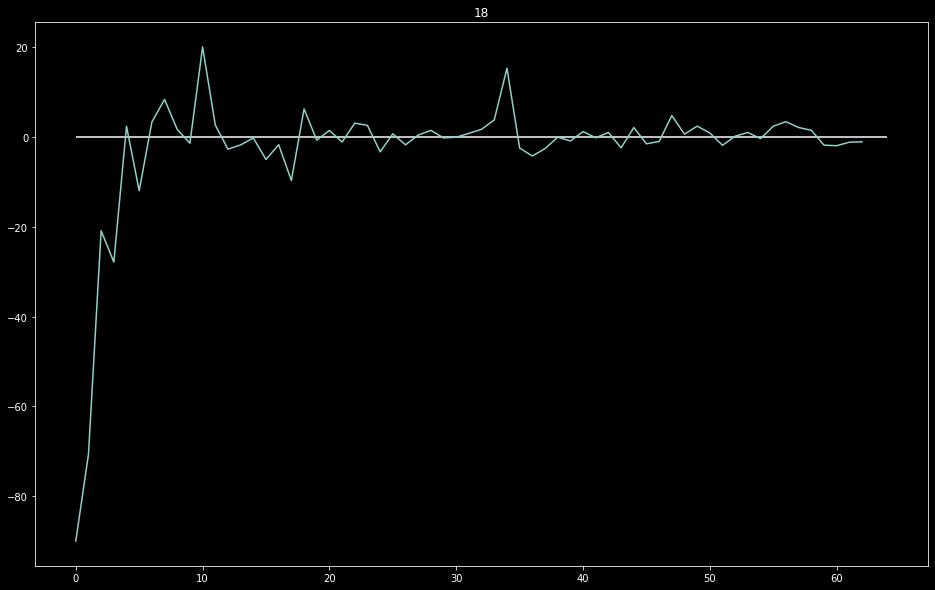

In [9]:
gscores = []

for genre in range(19):
    gnr = np.array([x[:26].reshape(-1) - lavg.reshape(-1) for x in genres[genre]])
    gnr = np.mean(lu.T[:64] @ gnr.T, axis=1)
    gscores.append(gnr)

    fig = plt.figure(figsize=(16, 10))
    ax = plt.axes()

    ax.hlines(0, 0, 64)
    plt.title(genre)
    plt.plot(gnr[1:])
    plt.show()

In [ ]:
testdata[16:23]

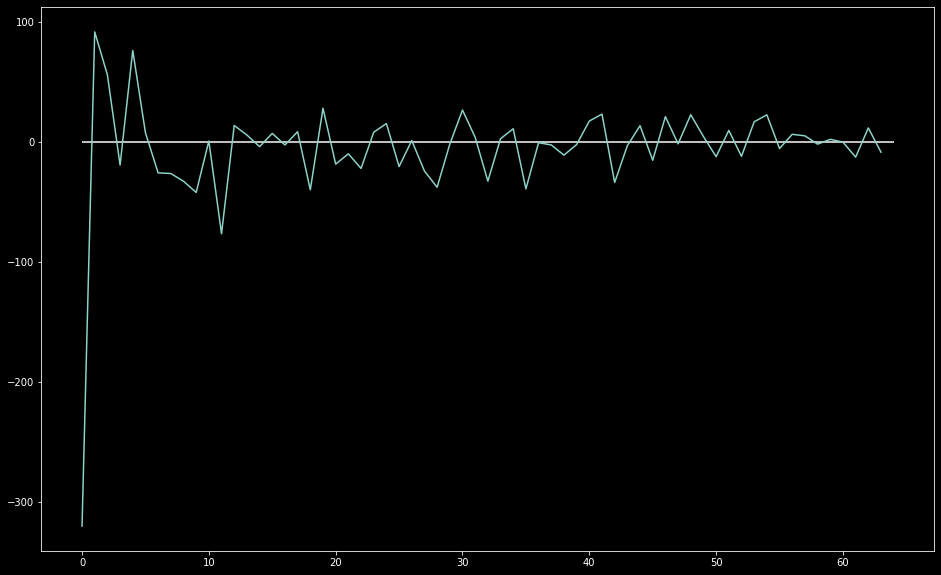

-133.05521014538147
109.4779464458157
108.66509742797729
37.51316132605079
-139.91198583641466
261.41615303975357
-121.53892577401632
96.20307255617504
56.14369187495526
56.08960682394696
-82.80001383938797
130.96944310384777
33.23745504021822
74.40925783833599
141.53356734346517
-20.644795036714953
172.50488280310032
124.28494918939266
-141.5402153507693


In [10]:
tgroup = np.array([x[0][:26].reshape(-1) - lavg.reshape(-1) for x in testdata[:7]])
song_score = np.mean(lu.T[:64] @ tgroup.T, axis=1)

fig = plt.figure(figsize=(16, 10))
ax = plt.axes()

ax.hlines(0, 0, 64)
plt.plot(song_score)
plt.show()

for x in gscores:
    print(np.sum(x[1:] - song_score[1:]))

In [15]:
np.sum(lu.T[:32] @ tgroup.T, axis=1)

array([-2.45842981e+02, -3.39183759e+03, -5.69001435e+02, -1.92682743e+02,
        1.46108834e+02, -3.09394022e+02,  6.97229354e+01,  6.45749706e+02,
        6.14823315e+01,  1.90280151e+01,  2.00654608e+01, -7.70364519e+01,
       -2.29560849e+02, -4.96226592e+01, -1.91026066e+01,  6.99672516e+00,
       -3.61071990e+01,  9.32809158e+01, -1.52658134e+02, -1.21803272e+02,
       -1.10815180e+02,  1.38705579e+02, -2.35074746e+02,  1.42791766e+01,
       -2.66540229e+02,  2.57463112e+01, -1.67820940e+02,  6.80568481e+01,
       -2.62796589e+00, -8.67085521e+00, -2.16881069e+02,  5.06612555e+01])

In [14]:
gscores[0][1:] - song_score[1:]

array([ 3.86867085e+02,  3.96552239e+01,  5.56507821e+01, -2.60967890e+01,
        5.59757512e+01, -1.09992352e+01, -9.54123969e+01, -5.53974214e+00,
       -6.48977518e+00,  1.46949901e+01,  1.80348881e+01,  4.07504745e+01,
        4.61278170e+00, -2.46974487e-02, -4.17190100e+00,  4.83387783e+00,
       -1.57092211e+01,  2.03300470e+01,  1.19541764e+01,  1.22306252e+01,
       -1.53860234e+01,  2.88127123e+01, -3.05786226e+00,  3.39803966e+01,
       -3.74550742e+00,  2.16362999e+01, -8.21881614e+00,  2.63231897e+00,
        2.82521411e+00,  2.36351840e+01, -6.45973419e+00])

In [19]:
gscores[0][1:]

array([-8.54419250e+02, -3.52949028e+01, -3.91062355e+01,  2.63719101e+01,
        3.87237221e-01,  1.98453140e+01, -8.17541313e+00, -9.24885273e+00,
        6.02454758e+00, -4.09415054e+00,  1.26677094e+01, -1.06984768e+01,
        1.27281685e+01,  9.23091471e-02,  1.35294771e+00, -4.82337236e+00,
       -3.18368411e+00, -4.31110859e-01, -2.36144692e-01, -3.11918527e-01,
       -2.06445813e+00,  1.74301133e-01,  2.68111527e-01, -1.36502528e+00,
       -1.10053942e-01, -1.67375231e+00, -4.16631728e-01, -1.02078497e+00,
        3.96026909e-01, -1.19244015e+00, -1.76212609e+00, -1.24182606e+00,
        1.73648918e+00,  7.48748958e-01, -6.60002306e-02,  2.66691685e-01,
        1.94818604e+00, -2.41842699e+00,  1.58541834e+00,  2.58816183e-01,
        7.90174782e-01,  1.00085628e+00,  6.70141399e-01, -1.87639046e+00,
       -1.00011729e-01, -8.82928550e-01, -2.40633376e-02, -7.49880224e-02,
       -1.72971010e+00,  3.87669913e-02, -2.07641628e-03, -1.87053204e+00,
        6.35369241e-01,  

In [21]:
song_score[1:]

array([ 1.94523270e+02,  4.29551353e+01, -3.13268995e+00,  7.52265625e+01,
        3.66553078e+01,  6.07150269e+00,  2.50546875e+01,  3.03172779e+01,
       -3.33222580e+01,  8.90974808e+01, -1.48667955e+01, -1.56254787e+01,
       -5.38310909e+00,  3.41804237e+01, -3.40423927e+01, -1.88306370e+01,
       -2.47908936e+01, -1.47552383e+00, -6.59430504e-01,  3.07622170e+00,
        1.89359391e+00,  6.33448792e+00, -4.06774998e+00,  3.70429063e+00,
       -4.08520203e+01,  2.76985264e+01,  1.95456944e+01, -1.80543575e+01,
        2.89821510e+01,  1.49814100e+01,  9.07392883e+00,  3.15404911e+01,
       -1.72872429e+01, -5.95201775e-02, -1.69384575e+01,  2.75506592e+01,
        1.99684334e+01,  1.48001480e+01, -1.87305126e+01, -1.05031767e+01,
        7.60882998e+00,  4.69390821e+00,  1.12510195e+01, -1.59362965e+01,
        2.79755402e+00,  3.04183960e-01,  1.57480192e+01, -1.33203793e+01,
        1.58402147e+01, -2.74161482e+00, -6.18954086e+00, -4.84991217e+00,
        4.76733780e+00,  

In [6]:
items = list(os.listdir(r'C:\Users\BBA\Coding\Audio\Classification\test'))

In [65]:
with open('train_labels', 'rt') as f:
    labels = f.readlines()
labels = [x.split(',') for x in labels]
labels = {x[1]: int(x[3]) for x in labels}
group = [x[0] for x in labels.items() if x[1] == 7]

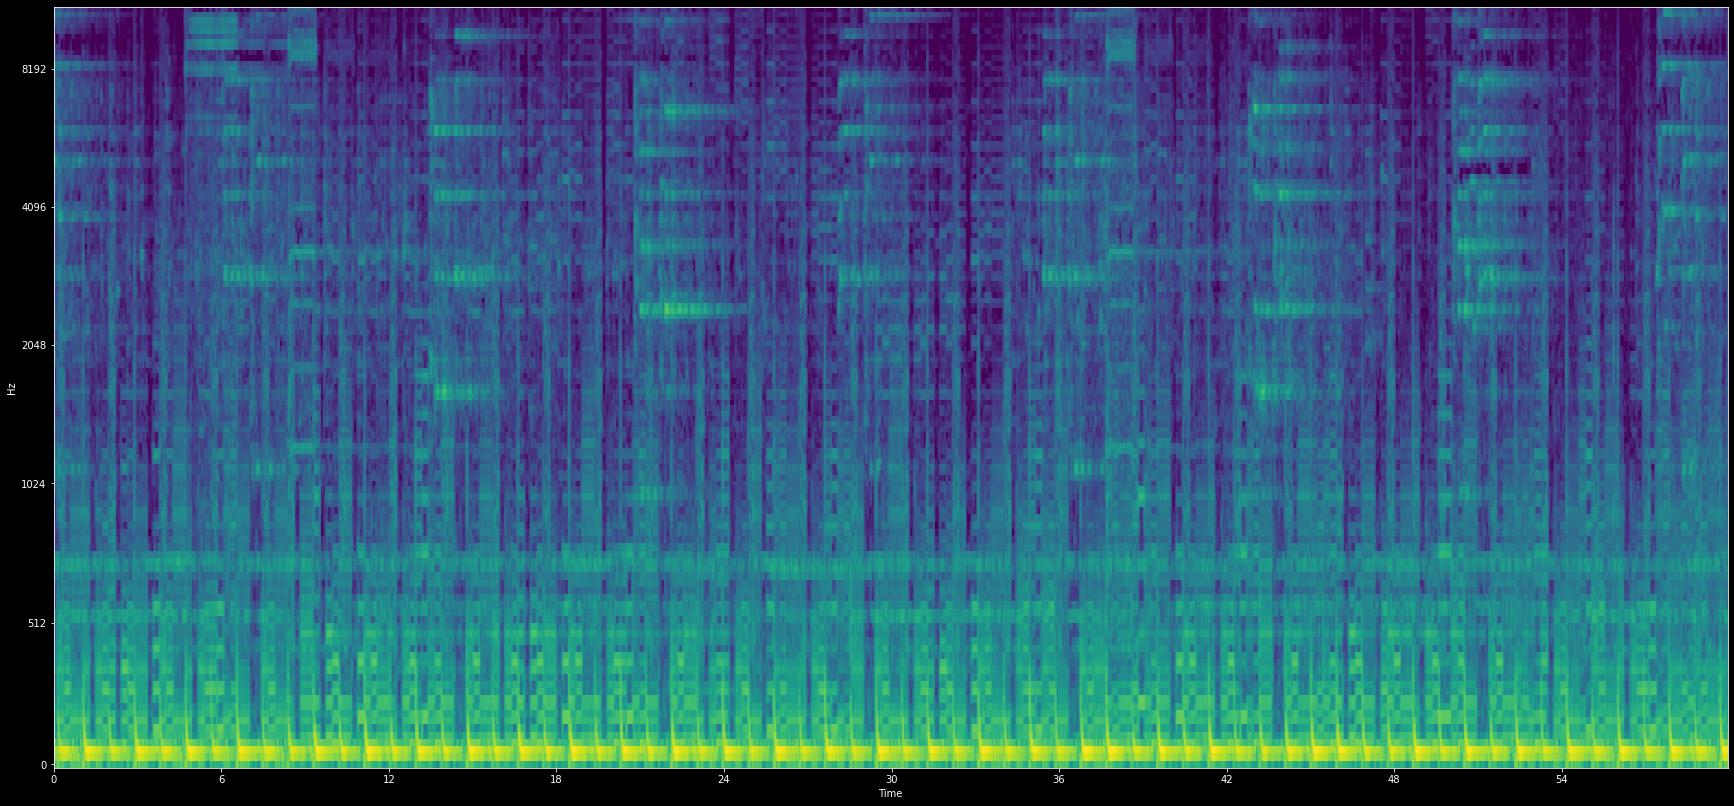

In [22]:
song, sr = librosa.load(f'test/{np.random.choice(items)}', sr=None)
print(sr)

scale = sr / 22050
msgram = librosa.feature.melspectrogram(y=song, sr=sr, fmax=4096,  n_fft=int(2048 * scale))
dbmsgram = librosa.power_to_db(msgram, ref=np.max)

fig = plt.figure(figsize=(30, 14))
ax = plt.axes()
librosa.display.specshow(dbmsgram, y_axis='mel', x_axis='time', ax=ax, cmap='viridis')
plt.show()


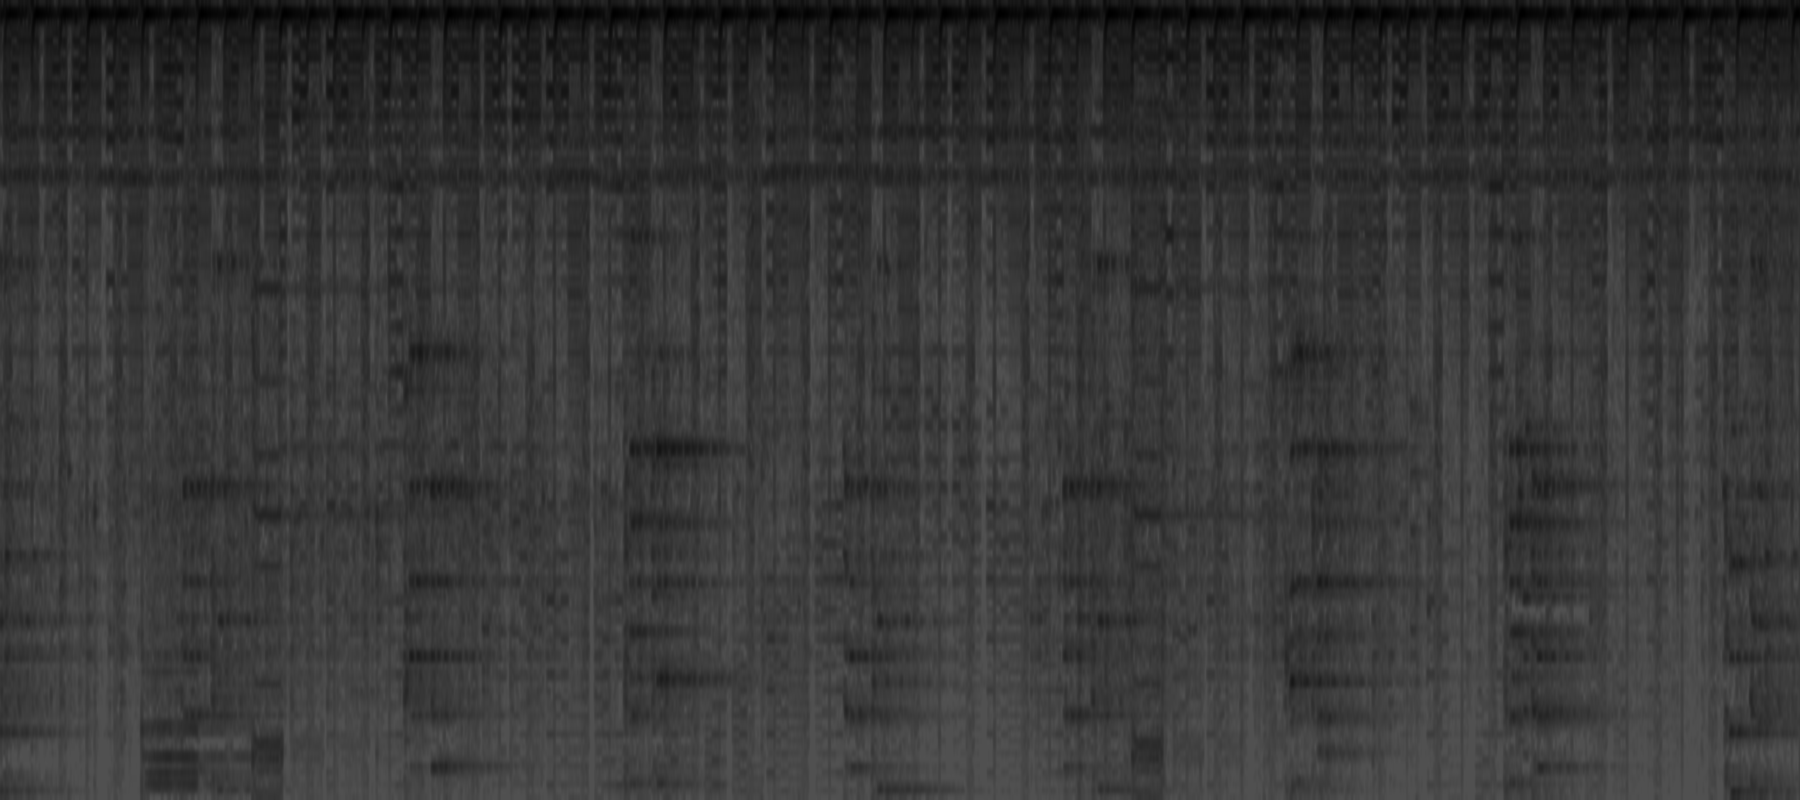

In [23]:
display(Image.fromarray(np.uint8(np.abs(dbmsgram))).resize((1800, 800)))